<a href="https://colab.research.google.com/github/Dwirizki14/Machine-Learning-Terapan/blob/main/sistem_rekomendasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir : Membuat Model Sistem Rekomendasi Drama Korea

# Laporan Proyek Machine Learning - Dwi Rizki Kurnia

# Project Overview

Industri hiburan Korea Selatan, khususnya drama Korea (K-Drama), mengalami pertumbuhan yang signifikan dalam satu dekade terakhir dan telah memperoleh basis penggemar global yang besar. Menurut data dari Korea Creative Content Agency (KOCCA), ekspor konten drama Korea mencapai lebih dari 500 juta USD pada tahun 2023, menandakan minat yang terus meningkat terhadap konten ini secara global.

Dengan begitu banyak pilihan judul dan genre yang beragam, pengguna sering kali merasa kewalahan saat ingin memilih drama yang sesuai dengan preferensi mereka. Di sinilah sistem rekomendasi memainkan peran penting dalam membantu pengguna menemukan tayangan yang relevan, menarik, dan sesuai selera mereka.

Proyek ini bertujuan untuk membangun sistem rekomendasi drama Korea menggunakan pendekatan Content-Based Filtering, dengan memanfaatkan fitur genre sebagai dasar analisis. Pendekatan ini dipilih karena tidak memerlukan data pengguna seperti riwayat interaksi, dan cocok diterapkan pada dataset yang belum memiliki data user secara eksplisit.

Sistem ini penting untuk dikembangkan karena dapat:

- Membantu pengguna menemukan drama Korea baru yang sesuai dengan minat mereka,

- Mengurangi waktu pencarian dan eksplorasi konten secara manual,

- Memberikan insight kepada platform streaming atau penyedia konten dalam menyusun rekomendasi untuk pengguna baru (cold start).

Riset sebelumnya menunjukkan bahwa Content-Based Filtering efektif diterapkan dalam sistem rekomendasi berbasis metadata konten seperti genre, sinopsis, atau direktur produksi (Lops et al., 2011). Dengan menggunakan pendekatan seperti TF-IDF vectorization dan cosine similarity, proyek ini akan menunjukkan bagaimana preferensi berdasarkan konten dapat dijadikan dasar sistem rekomendasi yang efisien dan relevan.



# Business Understanding

**Problem Statements**

1. Bagaimana cara merekomendasikan drama Korea kepada pengguna berdasarkan preferensi genre mereka?
2. Bagaimana mengukur kemiripan antar drama berdasarkan informasi genre yang tersedia?


**Goals**

1. Membangun sistem rekomendasi drama Korea yang dapat menyarankan tontonan kepada pengguna berdasarkan genre yang mereka sukai.
2. Menggunakan teknik *Content-Based Filtering* dengan pendekatan *TF-IDF* dan *cosine similarity* untuk mengukur kemiripan antar drama.


**Solution Approach**

- Menggunakan *TF-IDF Vectorizer* untuk mengubah informasi genre menjadi representasi numerik.
- Menghitung *cosine similarity* antar drama berdasarkan representasi TF-IDF.
- Membuat fungsi rekomendasi untuk menyarankan drama yang mirip berdasarkan input pengguna.

# Data Understanding

Dataset ini berjudul "Top 250 Korean Dramas (KDrama) Dataset" dan tersedia di Kaggle:
🔗 https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset

Dataset berisi 250 baris dan 17 fitur.


Fitur-Fitur:

- Name: Judul drama Korea (object)

- Aired Date: Tanggal penayangan pertama (object)

- Year of release: Tahun rilis drama (int64)

- Original Network: Jaringan TV yang menayangkan drama (object)

- Aired On: Hari penayangan (object)

- Number of Episodes: Jumlah total episode (int64)

- Duration: Durasi tiap episode (object)

- Content Rating: Batasan usia penonton (object)

- Rating: Skor rating dari penonton (float64)

- Synopsis: Ringkasan cerita (object)

- Genre: Genre drama (object)

- Tags: Tag/keyword tambahan (object)

- Director: Sutradara utama (object)

- Screenwriter: Penulis skenario (object)

- Cast: Aktor dan aktris utama (object)

- Production companies: Rumah produksi drama (object)

- Rank: Peringkat berdasarkan popularitas (object)

In [82]:
#Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import zipfile
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
%matplotlib inline
!pip install -q kaggle

In [83]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"dwirizkii","key":"833eee73d62994c6b97c42d2a01e314a"}'}

In [84]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [85]:
!kaggle datasets download -d ahbab911/top-250-korean-dramas-kdrama-dataset

Dataset URL: https://www.kaggle.com/datasets/ahbab911/top-250-korean-dramas-kdrama-dataset
License(s): CC0-1.0
top-250-korean-dramas-kdrama-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [86]:
!unzip /content/top-250-korean-dramas-kdrama-dataset.zip

Archive:  /content/top-250-korean-dramas-kdrama-dataset.zip
replace kdrama.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: kdrama.csv              


Selanjutnya, kita baca data di atas dengan menggunakan fungsi pandas.read_csv.

In [87]:
df = pd.read_csv('kdrama.csv')

print('Jumlah data pada kdrama: ', len(df))


Jumlah data pada kdrama:  250


# Univariate Exploratory Data Analysis

In [88]:
df

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Live Up to Your Name,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","Historical, Romance, Medical, Fantasy","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,Queen for Seven Days,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"Historical, Romance, Melodrama, Political","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,Memory,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"Law, Romance, Life, Drama","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,A Korean Odyssey,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","Horror, Comedy, Romance, Fantasy","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

Dari dataset tersebut ada:

Jumlah Data
Dataset memiliki 250 baris/entri, yang berarti terdapat 250 drama Korea yang didaftarkan.

Jumlah Fitur (Kolom)
Terdapat 17 kolom/fitur yang menjelaskan berbagai aspek dari masing-masing drama

In [90]:
# Jumlah baris dan kolom
print("Jumlah data:", df.shape)

Jumlah data: (250, 17)


Ada 250 baris (drama) dan 17 kolom (fitur).

# Data Preprocessing

In [91]:
# Cek jumlah data kosong di setiap kolom
print(df.isnull().sum())

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64


 Ada nilai kosong pada beberapa kolom seperti Content Rating, Director, Screenwriter, Production companies

In [92]:
df.duplicated().sum()

np.int64(0)

Tidak ada data duplikat pada dataset tersebut

In [93]:
df = df.drop(columns=[
    'Aired Date', 'Original Network', 'Aired On',
    'Number of Episodes', 'Duration', 'Content Rating',
    'Director', 'Screenwriter', 'Cast', 'Production companies', 'Rank'
])

df.drop(columns=[...]):
Fungsi ini digunakan untuk menghapus kolom-kolom tertentu dari DataFrame df.

Tujuannya:

Menyederhanakan data hanya ke kolom-kolom yang benar-benar penting untuk sistem rekomendasi berbasis konten (content-based)

# Exploratory Data Analysis

In [94]:
df.columns

Index(['Name', 'Year of release', 'Rating', 'Synopsis', 'Genre', 'Tags'], dtype='object')

**Distribusi Rating**

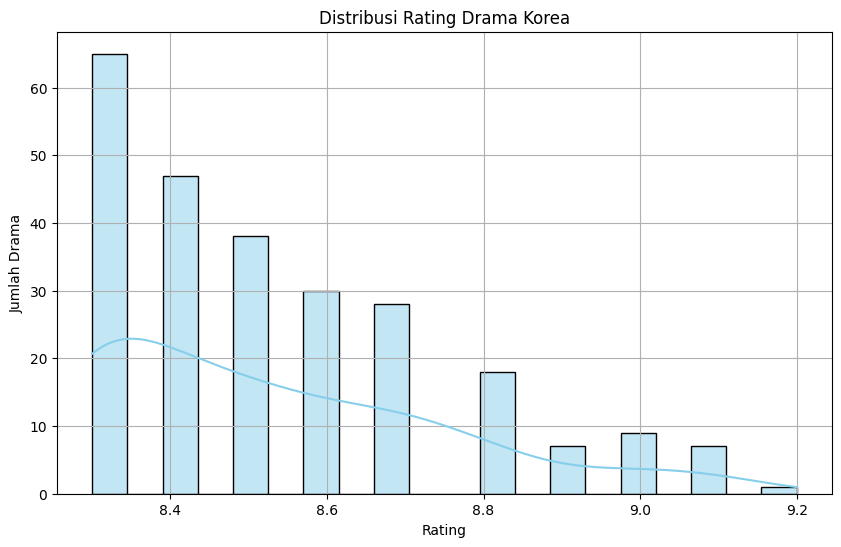

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating Drama Korea')
plt.xlabel('Rating')
plt.ylabel('Jumlah Drama')
plt.grid(True)
plt.show()

**Jumlah Drama Berdasarkan Tahun Rilis**

<ipython-input-96-43d0d85721fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year of release', data=df, palette='viridis')


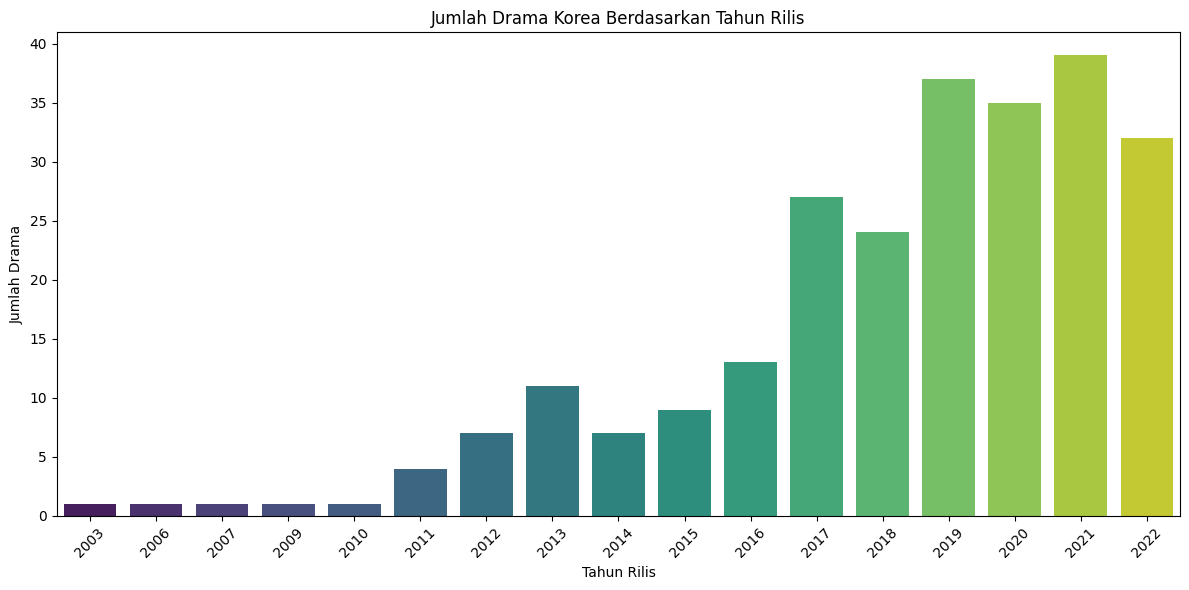

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year of release', data=df, palette='viridis')
plt.title('Jumlah Drama Korea Berdasarkan Tahun Rilis')
plt.xticks(rotation=45)
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Drama')
plt.tight_layout()
plt.show()

**Genre Drama Korea Teratas**

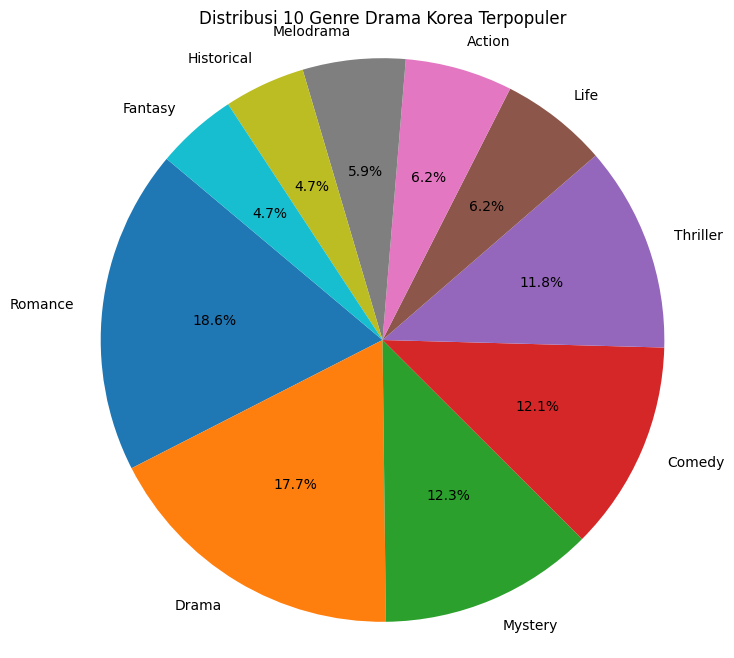

In [97]:
# Gabungkan semua genre jadi satu list
all_genres = ','.join(df['Genre']).split(',')
genre_list = [genre.strip() for genre in all_genres]

# Hitung frekuensi tiap genre
genre_counts = Counter(genre_list)

# Ambil 10 genre teratas
top_genres = genre_counts.most_common(10)

# Pisahkan nama genre dan jumlahnya
labels, values = zip(*top_genres)

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Distribusi 10 Genre Drama Korea Terpopuler')
plt.axis('equal')  # Supaya lingkarannya bulat
plt.show()


# Data Preparation

**Encoding**

In [98]:
# Hilangkan baris dengan Genre kosong
df = df.dropna(subset=['Genre'])

# Ubah Genre menjadi list
df['Genre_list'] = df['Genre'].apply(lambda x: [i.strip() for i in x.split(',')])

# Encoding genre menggunakan MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genre_list'])

- Data genre diubah menjadi list agar bisa di-encode.

- Digunakan MultiLabelBinarizer untuk membuat representasi numerik genre dalam bentuk multi-hot encoding.

Ini agar data bisa digunakan pada algoritma KNN yang berbasis vektor.

# Modeling

# Content Based Filtering

**TF-IDF Vectorizer**

In [99]:
# Buat TF-IDF vectorizer, bisa pakai stop_words='english' supaya kata umum diabaikan
tfidf = TfidfVectorizer(stop_words='english')

# Fit dan transform kolom Genre
tfidf_matrix = tfidf.fit_transform(df['Genre'])

# Lihat fitur kata yang ditemukan
feature_names = tfidf.get_feature_names_out()
print("Fitur kata dari Genre:")
print(feature_names)

Fitur kata dari Genre:
['action' 'adventure' 'business' 'comedy' 'crime' 'drama' 'family'
 'fantasy' 'fi' 'food' 'friendship' 'historical' 'horror' 'law' 'life'
 'medical' 'melodrama' 'military' 'music' 'mystery' 'political'
 'psychological' 'romance' 'school' 'sci' 'sitcom' 'sports' 'supernatural'
 'thriller' 'youth']


TF-IDF menemukan 30 genre/kata unik dari kolom 'Genre'.

Contoh genre yang dikenali: 'comedy', 'romance', 'mystery', 'life', 'medical', dll.

Genre seperti 'sci' dan 'fi' muncul terpisah karena mungkin ditulis sebagai 'sci-fi' dan dipisah oleh tokenizer.

In [100]:
print(tfidf_matrix.shape)

(250, 30)


tfidf_matrix adalah matriks hasil transformasi TF-IDF dari kolom Genre di dataset

Bentuk (shape) matriks ini adalah (250, 30) yang berarti:

- 250 baris = jumlah data drama (row) sebanyak 250 entri drama.

- 30 kolom = jumlah fitur unik kata/genre yang ditemukan oleh TF-IDF dari semua data drama.

In [101]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.4138653 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.52885242, 0.        , 0.        , ..., 0.        , 0.4038826 ,
         0.        ]])

todense() membuat matriks TF-IDF yang sebelumnya hemat memori menjadi bentuk lengkap yang mudah dibaca dan dianalisis.

In [102]:
# Buat DataFrame dari matriks TF-IDF, dengan index judul drama
tfidf_df = pd.DataFrame(tfidf_matrix.todense(),
                        columns=tfidf.get_feature_names_out(),
                        index=df['Name'])
sample_tfidf = tfidf_df.sample(10, axis=0).sample(24, axis=1)

print(sample_tfidf)

                     youth   mystery  music      life  psychological  school  \
Name                                                                           
Run On                 0.0  0.000000    0.0  0.465443       0.000000     0.0   
100 Days My Prince     0.0  0.000000    0.0  0.000000       0.000000     0.0   
All of Us Are Dead     0.0  0.000000    0.0  0.000000       0.000000     0.0   
God's Gift: 14 Days    0.0  0.429684    0.0  0.000000       0.000000     0.0   
Leverage               0.0  0.395777    0.0  0.000000       0.000000     0.0   
Yumi's Cells           0.0  0.000000    0.0  0.000000       0.753674     0.0   
A Korean Odyssey       0.0  0.000000    0.0  0.000000       0.000000     0.0   
Search: WWW            0.0  0.000000    0.0  0.000000       0.000000     0.0   
Vincenzo               0.0  0.000000    0.0  0.000000       0.000000     0.0   
Save Me                0.0  0.470656    0.0  0.000000       0.000000     0.0   

                      fantasy  politica

- sample(10, axis=0) mengambil 10 baris secara acak dari DataFrame (10 drama secara acak).

- sample(24, axis=1) mengambil 24 kolom secara acak dari DataFrame (24 kata/genre secara acak).

DataFrame ini membantu melihat representasi numerik (vektor) setiap drama berdasarkan genre/kata kunci.

**Cosine Similarity**

Cosine similarity mengukur kemiripan sudut antara dua vektor (dalam hal ini, dua drama yang direpresentasikan oleh vektor TF-IDF mereka). Nilai cosine similarity berkisar antara -1 sampai 1, tetapi karena TF-IDF bernilai positif, hasilnya biasanya antara 0 dan 1.

- Nilai 1 berarti dua vektor identik (drama sangat mirip dari segi genre/kata).

- Nilai 0 berarti dua vektor tidak memiliki kemiripan sama sekali (drama sangat berbeda genre/kata).

In [103]:

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.22920656, ..., 0.42750999, 0.        ,
        0.        ],
       [0.        , 1.        , 0.08014509, ..., 0.10848389, 0.09174386,
        0.57818293],
       [0.22920656, 0.08014509, 1.        , ..., 0.31923213, 0.07064362,
        0.        ],
       ...,
       [0.42750999, 0.10848389, 0.31923213, ..., 1.        , 0.09562275,
        0.        ],
       [0.        , 0.09174386, 0.07064362, ..., 0.09562275, 1.        ,
        0.        ],
       [0.        , 0.57818293, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Bentuk outputnya adalah sebuah matriks persegi (array 2D) berukuran 250 x 250 (karena ada 250 drama), di mana:

- Baris ke-i dan kolom ke-j menunjukkan nilai cosine similarity antara drama ke-i dengan drama ke-j.

- Di diagonal utama (cosine_sim[i][i]) selalu bernilai 1, karena setiap drama pasti identik dengan dirinya sendiri.

- Nilai lain di luar diagonal menunjukkan tingkat kemiripan antar drama yang berbeda.

In [104]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama drama
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['Name'], columns=df['Name'])

# Menampilkan ukuran similarity matrix
print('Shape:', cosine_sim_df.shape)

# Melihat sebagian isi similarity matrix
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (250, 250)


Name,The Guest,Good Manager,Squid Game,The Smile Has Left Your Eyes,Once Again
Name,,,,,
It's Okay to Not Be Okay,0.000000,0.248369,0.137115,0.308085,0.416811
Crazy Love,0.000000,0.377892,0.208620,0.468750,0.634175
Good Doctor,0.000000,0.089739,0.124315,0.279325,0.212435
Memorist,0.626481,0.000000,0.706666,0.436742,0.000000
Alchemy of Souls,0.000000,0.000000,0.324043,0.133168,0.101278
Tale of the Nine-Tailed,0.610039,0.000000,0.175271,0.326735,0.093924
Team Bulldog: Off-duty Investigation,0.159411,0.272443,0.770448,0.431920,0.332832
Happiness,0.148047,0.096480,0.693539,0.394138,0.117866
If You Wish Upon Me,0.000000,0.089739,0.124315,0.279325,0.212435


- Misalnya, nilai cosine_sim_df.loc['Memorist', 'Squid Game'] = 0.706666 menunjukkan drama "Memorist" dan "Squid Game" memiliki kemiripan genre yang cukup tinggi (nilai cosine similarity sekitar 0.7).

- Nilai 0 berarti tidak ada kemiripan genre sama sekali.

- Nilai diagonal (tidak ditampilkan di sini) selalu 1, karena setiap drama identik dengan dirinya sendiri.



**Mendapatkan Rekomendasi**

In [105]:
def kdrama_recommendation(kdrama_name, k=5):
    if kdrama_name not in cosine_sim_df.index:
        return f"Drama '{kdrama_name}' tidak ditemukan dalam data."

    similarity_scores = cosine_sim_df[kdrama_name].sort_values(ascending=False)
    similar_titles = similarity_scores.iloc[1:k+1].index

    return df[df['Name'].isin(similar_titles)][['Name', 'Genre']]

Fungsi ini digunakan untuk memberikan rekomendasi drama Korea yang mirip dengan drama yang diinputkan (kdrama_name) berdasarkan nilai kemiripan cosine similarity antar drama.

In [106]:
print(kdrama_recommendation('SKY Castle'))

                Name                                        Genre
4          My Mister       Psychological,  Life,  Drama,  Family 
33     The Penthouse         Thriller,  Mystery,  Drama,  Family 
37       Beyond Evil  Thriller,  Mystery,  Psychological,  Drama 
45   The Penthouse 2         Thriller,  Mystery,  Drama,  Family 
149    Hello Monster      Thriller, Mystery, Psychological, Drama



Ini artinya, jika seseorang menyukai SKY Castle, maka model merekomendasikan 5 drama berikut karena mereka memiliki kemiripan genre dan tema yang tinggi berdasarkan cosine similarity:

1. My Mister: karena temanya tentang kehidupan dan keluarga yang emosional.

2. The Penthouse & Penthouse 2: karena keduanya mengangkat drama keluarga yang intens dan penuh konflik.

3. Beyond Evil & Hello Monster: karena mengandung misteri, psikologis, dan drama—mirip dengan ketegangan dan intrik di SKY Castle.

# Model KNN

In [107]:
# Fit KNN model
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='euclidean', algorithm='brute')
knn.fit(genre_encoded)

# Fungsi rekomendasi berdasarkan Genre
def recommend_knn(title, n_recommendations=5):
    if title not in df['Name'].values:
        return f"Drama '{title}' tidak ditemukan dalam dataset."

    idx = df[df['Name'] == title].index[0]
    distances, indices = knn.kneighbors([genre_encoded[idx]], n_neighbors=n_recommendations + 1)

    result = []
    for i in range(1, len(distances[0])):  # skip diri sendiri
        result.append({
            'Recommended': df.iloc[indices[0][i]]['Name'],
            'Distance': distances[0][i]
        })

    return pd.DataFrame(result)

# Contoh rekomendasi
recommend_knn('SKY Castle')

,Recommended,Distance
0,My Mister,1.414214
1,Beyond Evil,1.414214
2,The Penthouse,1.414214
3,The Penthouse 2,1.414214
4,Hello Monster,1.414214


**Kolom Recommended:**

Menampilkan nama-nama drama Korea yang direkomendasikan.

Rekomendasi ini dihasilkan berdasarkan kemiripan genre dengan drama yang dimasukkan (dalam hal ini: "Hospital Playlist").


**Kolom Distance:**

Ini adalah jarak euclidean antara fitur genre drama target (Hospital Playlist) dengan drama lainnya di dalam vektor yang sudah di-encode.

Semakin kecil nilainya, semakin mirip dari sisi genre.

Jarak 0.000000 artinya identik — karena Hospital Playlist dibandingkan dengan dirinya sendiri (maka hasil ini bisa diabaikan dari rekomendasi sebenarnya).

# Evaluation

**Precision@K**

Precision @ K

Definisi: Persentase item rekomendasi dalam top-K yang benar-benar relevan dengan preferensi user.

Formula:

P
r
e
c
i
s
i
o
n
@
K
=
Jumlah item relevan dalam top-K/
K




Cara Metrik Ini Bekerja
Precision @ K: Kalau kita rekomendasikan 5 drama yang mirip (K=5), berapa banyak dari 5 itu yang benar-benar sesuai atau disukai user? Misalnya dari 5 drama direkomendasikan, 3 yang benar-benar mirip atau diminati, maka precision@5 = 3/5 = 0.6 atau 60%.

In [110]:
# Contoh ground truth manual (berdasarkan genre mirip atau informasi umum)
ground_truth = {
    'SKY Castle': ['The Penthouse', 'The Penthouse 2', 'My Mister', 'Hello Monster', 'Beyond Evil'],
    'Crash Landing on You': ['Descendants of the Sun', 'Goblin', 'It’s Okay to Not Be Okay', 'Legend of the Blue Sea', 'While You Were Sleeping'],
    'Vincenzo': ['The Fiery Priest', 'Lawless Lawyer', 'Stranger', 'Healer', 'Taxi Driver']
}

# Fungsi hitung Precision@K
def precision_at_k(kdrama_name, k=5):
    rekomendasi = kdrama_recommendation(kdrama_name, k)
    if isinstance(rekomendasi, str):  # handle error message
        return rekomendasi

    predicted_titles = rekomendasi['Name'].tolist()
    relevant_titles = ground_truth.get(kdrama_name, [])

    if not relevant_titles:
        return f"Tidak ada ground truth untuk '{kdrama_name}'."

    relevan_ditemukan = [title for title in predicted_titles if title in relevant_titles]

    precision = len(relevan_ditemukan) / k
    return {
        'Drama Input': kdrama_name,
        'Rekomendasi': predicted_titles,
        'Ground Truth': relevant_titles,
        'Relevan Ditemukan': relevan_ditemukan,
        'Precision@{}'.format(k): round(precision, 2)
    }

In [111]:
print(precision_at_k('SKY Castle', k=5))

{'Drama Input': 'SKY Castle', 'Rekomendasi': ['My Mister', 'The Penthouse', 'Beyond Evil', 'The Penthouse 2', 'Hello Monster'], 'Ground Truth': ['The Penthouse', 'The Penthouse 2', 'My Mister', 'Hello Monster', 'Beyond Evil'], 'Relevan Ditemukan': ['My Mister', 'The Penthouse', 'Beyond Evil', 'The Penthouse 2', 'Hello Monster'], 'Precision@5': 1.0}


Artinya: semua rekomendasi yang diberikan oleh sistem untuk SKY Castle benar-benar relevan menurut ground truth → Precision@5 = 1.0 atau 100%.